In [1]:
# simple linear regression
# 2017-03-11 jkang
# Python3.5
# Tensorflow1.0.1
# ref: http://web.stanford.edu/class/cs20si/
#
# input: number of fire
# output: number of theft

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [2]:
data_file = 'fire_theft.xls'

book = xlrd.open_workbook(data_file, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

X = tf.placeholder(tf.float64, shape=(), name='NumFire')
Y = tf.placeholder(tf.float64, shape=(), name='NumTheft')

w = tf.Variable(np.zeros(1), name='Weight')
b = tf.Variable(np.zeros(1), name='Bias')

Y_predict = tf.add(tf.multiply(X, w), b)

def huber_loss(labels, predictions, delta=1.0):
    # Huber loss (outlier robust)
    delta = np.array(delta, dtype=np.float64)
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)
loss = huber_loss(Y, Y_predict, delta=1.0)

# loss = tf.square(tf.sub(Y, Y_predict), name='loss')

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.01).minimize(loss)

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graph', sess.graph)

    # online training
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss / n_samples))

    w_value, b_value = sess.run([w, b])

writer.close()

Epoch 0: [ 20.78248941]
Epoch 1: [ 17.5085926]
Epoch 2: [ 17.43059022]
Epoch 3: [ 17.35258784]
Epoch 4: [ 17.27458546]
Epoch 5: [ 17.19658309]
Epoch 6: [ 17.11858071]
Epoch 7: [ 17.04057833]
Epoch 8: [ 16.96257595]
Epoch 9: [ 16.88457357]
Epoch 10: [ 16.80657119]
Epoch 11: [ 16.72856881]
Epoch 12: [ 16.65056643]
Epoch 13: [ 16.57189105]
Epoch 14: [ 16.49214522]
Epoch 15: [ 16.41331964]
Epoch 16: [ 16.30321906]
Epoch 17: [ 16.16355141]
Epoch 18: [ 16.11939643]
Epoch 19: [ 15.89864353]
Epoch 20: [ 16.00006652]
Epoch 21: [ 15.55065575]
Epoch 22: [ 15.84791581]
Epoch 23: [ 15.37867564]
Epoch 24: [ 15.71846368]
Epoch 25: [ 15.07982732]
Epoch 26: [ 15.62268616]
Epoch 27: [ 15.03241077]
Epoch 28: [ 15.48340592]
Epoch 29: [ 14.69999218]
Epoch 30: [ 15.40843224]
Epoch 31: [ 14.96007081]
Epoch 32: [ 14.97233815]
Epoch 33: [ 14.66121992]
Epoch 34: [ 15.15022668]
Epoch 35: [ 14.38269019]
Epoch 36: [ 15.06684032]
Epoch 37: [ 14.25294879]
Epoch 38: [ 14.98151321]
Epoch 39: [ 14.43444012]
Epoch 40: [

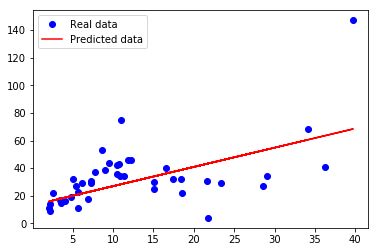

In [4]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()